In [ ]:
import pandas as pd
import sklearn.model_selection as ms
import numpy as np

import sklearn.linear_model as lm
import sklearn.metrics as mt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('calonpembeli_ch5.csv')

df

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1
...,...,...,...,...,...,...,...
995,996,51,0,1,2,293,1
996,997,61,1,0,2,275,1
997,998,45,1,0,0,406,1
998,999,48,0,1,2,432,1


In [3]:
df[df['Memiliki_Mobil'] == 0]

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
6,7,38,2,1,0,150,0
7,8,29,1,1,0,143,0
8,9,30,2,0,0,200,1
9,10,51,1,1,0,174,0
...,...,...,...,...,...,...,...
987,988,31,3,0,0,150,0
991,992,52,0,0,0,252,1
992,993,62,3,0,0,401,1
993,994,25,2,0,0,208,0


In [4]:
df = df[df["Usia"] <= 100]

In [5]:
df

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1
...,...,...,...,...,...,...,...
995,996,51,0,1,2,293,1
996,997,61,1,0,2,275,1
997,998,45,1,0,0,406,1
998,999,48,0,1,2,432,1


In [6]:
df.isna().sum()

ID                0
Usia              0
Status            0
Kelamin           0
Memiliki_Mobil    0
Penghasilan       0
Beli_Mobil        0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
x = df[["Usia","Status","Kelamin","Memiliki_Mobil","Penghasilan"]]
y = df[["Beli_Mobil"]]

In [9]:
X_train, x_test , y_train, y_test = ms.train_test_split(x,y,test_size = 0.1, random_state = 0)

In [10]:
model = lm.LogisticRegression()
model.fit(X_train,y_train)

C:\Users\wills\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [11]:
model.coef_ #slope 


array([[-0.01617273, -0.08879143, -1.14527241,  0.08052443,  0.05830301]])

In [12]:
model.intercept_

array([-11.44067751])

In [13]:
y_predict = model.predict(x_test)
y_predict

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1])

In [14]:
x_test.head()

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan
272,54,3,0,0,416
727,45,2,1,1,131
31,37,2,1,1,203
344,58,0,0,1,265
606,53,1,0,1,348


In [15]:
y_test.head()

,Beli_Mobil
272,1
727,0
31,0
344,1
606,1


In [16]:
confusion = mt.confusion_matrix(y_test,y_predict)

In [17]:
confusion

array([[31,  4],
       [ 1, 64]])

score for checking how much TP/TN the result have if there is mre the score will be higer but not better

In [18]:
score = model.score(x_test,y_test)
score

0.95

F positif total 
if F positif total is high it will get a lower score

In [19]:
precision = mt.precision_score(y_test,y_predict)
precision

np.float64(0.9411764705882353)

FN total 
if FN total is high it will get a lower score

In [20]:
recall = mt.recall_score(y_test,y_predict)
recall

np.float64(0.9846153846153847)

In [21]:
auc = mt.roc_auc_score(y_test,y_predict)
auc

np.float64(0.9351648351648352)

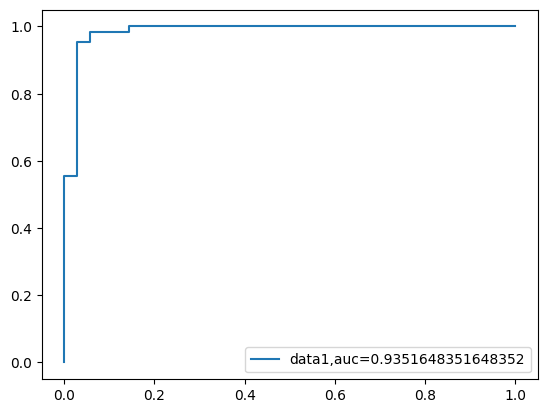

In [22]:
y_pred_proba = model.predict_proba(x_test)[::,1]
fp,tp,_ =  mt.roc_curve(y_test,y_pred_proba)
plt.plot(fp,tp,label = "data1,auc="+str(auc))
plt.legend(loc = 4)
plt.show()

feature selection

In [ ]:
import sklearn.feature_selection as fs
rfe = fs.RFE(model)
rfe = rfe.fit(X_train,y_train)
rfe.support_
rfe.ranking_

C:\Users\wills\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wills\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wills\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

array([4, 1, 1, 3, 2])

: 